By a saddle-point approximation to Lewis equation, we derive analytic form of large-time vol smile implied from model. In this note, we outline, justify and exemplify the approach in the case of Heston/VG/CGMY/BG. From here, we inspire some parametrizations of vol smile.

The approach was developed during my summer internship at Morgan Stanley, with some inputs from my supervisor King Wang.

Table of Content:

* [Lewis Equation](#Lewis-Equation)
* [Saddle-Point Equation](#Saddle-Point-Equation)
* [In a Nutshell](#In-a-Nutshell)
* [Gaussian Approximation](#Gaussian-Approximation)
* [Moment Expansion](#Moment-Expansion)
* [Existence of Variance Solution](#Existence-of-Variance-Solution)
* [Large-Time Heston Smile](#Large-Time-Heston-Smile)
* [Large-Time VG Smile](#Large-Time-VG-Smile)
* [Large-Time BG Smile](#Large-Time-BG-Smile)
* [Large-Time CGMY Smile](#Large-Time-CGMY-Smile)
* [Comments on Saddle-Point Trick](#Comments-on-Saddle-Point-Trick)
* [References](#References)

# Lewis Equation

Define log-spot $X_T=\log(S_T/S_0)$ and log-strike $k=\log(K/S_0)$.

Lewis equation states that under characteristic function $\phi_T(u)=Ee^{iuX_T}$, call price

$$ C(S,K) = S - \frac{\sqrt{SK}}{2\pi} \int_{-\infty}^\infty \frac{du}{u^2+\frac{1}{4}} e^{-iuk} \phi_T\left(u-\frac{i}{2}\right) $$

Under BS, $\phi_T^{BS}(u) = e^{-\frac{1}{2}u(u+i)\sigma^2T}$. For each strike $K$, we quote $C(K)$ in $C_{BS}(K)$, thus

$$ \int_{-\infty}^\infty \frac{du}{u^2+\frac{1}{4}} e^{-iuk} \phi_T\left(u-\frac{i}{2}\right) = \int_{-\infty}^\infty \frac{du}{u^2+\frac{1}{4}} e^{-iuk} e^{-\frac{1}{2}\left(u^2+\frac{1}{4}\right)\sigma(k)^2T} $$

where $\sigma(k)$ is implied vol (of our interest!).

# Saddle-Point Equation

We assume characteristic function $\phi_T(u-i/2) \sim e^{-\psi(u)T}$ for large $T$. 

Physically this says, at large time, log-spot $X_T$ evolves like a Levy process, so that time $T$ in characteristic exponent factors out. By definition, this is satisfied by all Levy processes, and some path-dependent processes that forget about its initial states over time e.g.\ Heston/SVJ.

Define time-scaled log-strike $x=k/T$, abbreviated strike below. Substituting the large-time $\phi_T$ into LHS we get

$$ \int_{-\infty}^\infty \frac{du}{u^2+\frac{1}{4}} e^{-(iux+\psi(u))T} $$

Now, Taylor-expand the exponent around saddle-point $\tilde{u}$:

$$ ix\tilde{u} + ix(u-\tilde{u}) + \psi(\tilde{u}) + \psi'(\tilde{u})(u-\tilde{u}) + \frac{\psi''(\tilde{u})}{2}(u-\tilde{u})^2 + O(u-\tilde{u})^3 $$

Require $\psi'(\tilde{u}) = -ix$ (now keep in mind $\tilde{u}=\tilde{u}(x)$) to kill linear term, then LHS simplifies to

$$ \int_{-\infty}^\infty \frac{du}{u^2+\frac{1}{4}} e^{-(ix\tilde{u}+\psi(\tilde{u}))T - \frac{\psi''(\tilde{u})T}{2}(u-\tilde{u})^2 - T \cdot O(u-\tilde{u})^3} \approx \frac{e^{-(ix\tilde{u}+\psi(\tilde{u}))T}}{\tilde{u}^2+\frac{1}{4}} \sqrt{\frac{2\pi}{\psi''(\tilde{u})T}} $$

The approximation $e^{-(ix\tilde{u}+\psi(\tilde{u}))T} \sim \text{Gaussian}$ is valid when (1) $ix\tilde{u}+\psi(\tilde{u})$ is real (2) $\psi''(\tilde{u})>0$ (3) $T$ is large, because

* for $u$ far away from $\tilde{u}$ and $T$ large, $e^{- T \cdot O(u-\tilde{u})^3} \rightarrow 0$ -- tails flatten to zero
* for $u$ close to $\tilde{u}$, constant/quadratic term in $e^{-(ix\tilde{u}+\psi(\tilde{u}))T - \frac{\psi''(\tilde{u})}{2}(u-\tilde{u})^2 - T \cdot O(u-\tilde{u})^3}$ dominate
* thus exponential approximates a Gaussian

For BS, $\psi_{BS}(u) = \frac{1}{2} \left(u^2+\frac{1}{4}\right) v$ where $v = \sigma^2$ and noting $\psi'_{BS}(u) = uv$ and $\psi''_{BS}(u) = v$, by solving $\psi'_{BS}(\tilde{u}) = -ix$ we get

$$ \tilde{u}_{BS} = -\frac{ix}{v} $$

Thus our saddle-point condition:

$$ \begin{aligned}
\frac{e^{-(ix\tilde{u}+\psi(\tilde{u}))T}}{\tilde{u}^2+\frac{1}{4}} \sqrt{\frac{2\pi}{\psi''(\tilde{u})T}} &\sim \frac{e^{-(ix\tilde{u}_{BS}+\psi_{BS}(\tilde{u}_{BS}))T}}{\tilde{u}_{BS}^2+\frac{1}{4}} \sqrt{\frac{2\pi}{\psi''_{BS}(\tilde{u}_{BS})T}} \\
&= \frac{e^{-\left(\frac{x^2}{v}+\frac{v}{2}\left(\frac{1}{4}-\left(\frac{x}{v}\right)^2\right)\right)T}}{\frac{1}{4}-\left(\frac{x}{v}\right)^2} \sqrt{\frac{2\pi}{vT}} \\
&\approx 4 \exp\left( -\left(\frac{v}{8}+\frac{x^2}{2v}\right)T \right) \sqrt{\frac{2\pi}{vT}}
\end{aligned} $$

Const. terms are of similar orders (dominated by $e^{-(...)T}$) and we make exponent equal:

$$ \omega(x) \equiv ix\tilde{u}+\psi(\tilde{u}) \sim \frac{v}{8}+\frac{x^2}{2v} $$

a quadratic equation, with solution

$$ v(x) \sim 4 \left( \omega(x) \pm \sqrt{\omega(x)^2 - \frac{x^2}{4}} \right) $$

Denote $|\bar{\omega}(x)| \equiv \sqrt{\omega(x)^2 - \frac{x^2}{4}}$, vanishing at $x_\pm$ which solve $\omega(x) = \pm x/2$, chosen to fulfill $\bar{\omega}((x_-,x_+)) < 0$ and $\bar{\omega}(\mathbb{R}\backslash(x_-,x_+)) > 0$. Our variance smile 

$$ v(x) \sim 4 (\omega(x) - \bar{\omega}(x)) $$

We may express large-time asymptotic characteristic function in form $e^{-\psi(u)T}$ to reach a very wide class of model-inspired parametrizations.

# In a Nutshell

Denote time-scaled log-strike $x=k/T$ and variance $v(x)$, implied from characteristic function $\phi_T(u)=Ee^{iuX_T}$ where $X_T=\log(S_T/S_0)$. Our saddle-point procedure reads:

1. evaluate characteristic function $\phi_T(u-i/2) \equiv e^{-\psi(u)T}$ to get $\textcolor{magenta}{\psi(u)}$
2. compute saddle-point $\textcolor{magenta}{\tilde{u}}$ which fulfills $\psi'(\tilde{u}) = -ix$
3. evaluate $\textcolor{magenta}{\psi(\tilde{u})}$ thus $\textcolor{magenta}{\omega(x)} \equiv i\tilde{u} \cdot x + \psi(\tilde{u})$ and $\textcolor{magenta}{|\bar{\omega}(x)|} \equiv \sqrt{\omega(x)^2 - \frac{x^2}{4}}$
4. full smile given by $\textcolor{magenta}{v(x)} = 4\left( \omega(x) - \bar{\omega}(x) \right)$

Readers may first head to section [Large-Time Heston Smile](#Large-Time-Heston-Smile) (and the like) to understand practical use and how $\omega,\bar{\omega},v$ etc. actually look like before getting swamped by mathematical proofs below.

# Gaussian Approximation

Our large-time Gaussian approximation in Lewis equation is valid when (1) $ix\tilde{u}+\psi(\tilde{u})$ is real (2) $\psi''(\tilde{u})>0$. We now show that these are always true from cumulant property.

We first show that $i\tilde{u}$ and $\psi(\tilde{u})$ are always real.

In large time, recall our characteristic function

$$ \phi_T\left(u-\frac{i}{2}\right) = Ee^{\left(iu+\frac{1}{2}\right)X_T} = e^{-\psi(u)T} $$

thus $\psi(u)$ is a cumulant:

$$ \psi(u) = - \frac{1}{T} \log Ee^{\left(iu+\frac{1}{2}\right)X_T} $$

Differentiating,

$$ \psi'(u) = - \frac{1}{T} \frac{EiX_Te^{\left(iu+\frac{1}{2}\right)X_T}}{Ee^{\left(iu+\frac{1}{2}\right)X_T}} $$

$\tilde{u}$ satisfies

$$ \psi'(\tilde{u}) = - \frac{1}{T} \frac{EiX_Te^{\left(i\tilde{u}+\frac{1}{2}\right)X_T}}{Ee^{\left(i\tilde{u}+\frac{1}{2}\right)X_T}} = -ix $$

so

$$ EX_Te^{\left(\hat{u}+\frac{1}{2}\right)X_T} = k Ee^{\left(\hat{u}+\frac{1}{2}\right)X_T} $$

where we define $\hat{u} \equiv i\tilde{u}$. This is an equation in $\hat{u}$ -- does a real $\hat{u}$ exist and is it unique?

A more insightful form: define Esscher measure $\mathbb{U}$ s.t.

$$ \frac{d\mathbb{U}}{d\mathbb{P}} = \frac{e^{\left(\hat{u}+\frac{1}{2}\right)X_T}}{Ee^{\left(\hat{u}+\frac{1}{2}\right)X_T}} $$

where $\mathbb{P}$ is our pricing measure (we have always been working in). Then

$$ E^\mathbb{U} X_T = k $$

thus $\hat{u}(k)$ defines a measure under which expectation of log-spot is exactly log-strike. For $\mathbb{U}$ to be a properly defined measure, $\hat{u}$ has to be real -- does it exist and is it unique?

Intuitively, $\hat{u}$ translates log-spot density -- imagine Gaussian $f_{X_T}(x) \stackrel{\mathbb{P}}{\sim} e^{-x^2/2}$, then under $\mathbb{U}$, $f_{X_T}(x) \stackrel{\mathbb{U}}{\sim} e^{-(x-\hat{u})^2/2}$ and tanslation of density corresponds to translation of mean, so we can always suitably choose (solve for) $\hat{u}$ s.t. mean exactly matches log-strike i.e unique real $\hat{u}$ exists.

Now I make rigorous why $\hat{u}$, equivalently $\bar{u}=\hat{u}+1/2$, always exists and is unique. Rewrite the expectation equation as

$$ k = E^\mathbb{U} X_T = \frac{EX_Te^{\bar{u}X_T}}{Ee^{\bar{u}X_T}} = \frac{\partial}{\partial\bar{u}} \log Ee^{\bar{u}X_T} $$

This is the first derivative of cumulant (under pricing measure, not Esscher), which spans the support of $X_T \in \mathbb{R}$ (thus existence of at least a real root), and monotonically (thus one unique root $\hat{u}$), as its second denvative is variance -- always positive.

With real $\hat{u}$, $\mathbb{U}$ is a property defined measure equivalent to $\mathbb{P}$.

Now,

$$ \psi(\tilde{u}) = - \frac{1}{T} \log Ee^{\left(\hat{u}+\frac{1}{2}\right)X_T} \in \mathbb{R} $$

For our saddle-point approximation to be valid, we need $\psi''(\tilde{u}) > 0$:

$$ \begin{aligned}
\psi''(\tilde{u}) &= - \frac{1}{T} \left( - \frac{EX_T^2e^{\left(i\tilde{u}+\frac{1}{2}\right)X_T}}{Ee^{\left(i\tilde{u}+\frac{1}{2}\right)X_T}} - \frac{EiX_Te^{\left(i\tilde{u}+\frac{1}{2}\right)X_T}}{\left(Ee^{\left(i\tilde{u}+\frac{1}{2}\right)X_T}\right)^2} EiX_Te^{\left(i\tilde{u}+\frac{1}{2}\right)X_T} \right) \\
&= \frac{1}{T} \left( \frac{EX_T^2e^{\left(i\tilde{u}+\frac{1}{2}\right)X_T}}{Ee^{\left(i\tilde{u}+\frac{1}{2}\right)X_T}} - \left( \frac{EX_Te^{\left(i\tilde{u}+\frac{1}{2}\right)X_T}}{Ee^{\left(i\tilde{u}+\frac{1}{2}\right)X_T}} \right)^2 \right) \\
&= \frac{1}{T} \left( \frac{EX_T^2e^{\left(\hat{u}+\frac{1}{2}\right)X_T}}{Ee^{\left(\hat{u}+\frac{1}{2}\right)X_T}} - \left( \frac{EX_Te^{\left(\hat{u}+\frac{1}{2}\right)X_T}}{Ee^{\left(\hat{u}+\frac{1}{2}\right)X_T}} \right)^2 \right) \\
&= \frac{1}{T} \left( E^\mathbb{U} X_T^2 - \left( E^\mathbb{U} X_T \right)^2 \right) \\
&= \frac{V^\mathbb{U} X_T}{T}
\end{aligned} $$

i.e.\ $\psi''(\tilde{u})$ is log-spot variance under $\mathbb{U}$. As expected, because differentiated cumulant gives central moments.

Thus as long as we can write down characteristic function, for large $T$, our saddle-point condition is always valid.

We can computatonally check how large is large, say approx closed-form formula vs.\ FFT.

# Moment Expansion

To make things simplier, define

$$ \bar{u} = \hat{u} + \frac{1}{2} $$

Then we rewrite our cumulant

$$ \psi(\tilde{u}) = - \frac{1}{T} \log Ee^{\bar{u}X_T} $$

and saddle-point equation

$$ k = E\left[ X_T \frac{e^{\bar{u}X_T}}{Ee^{\bar{u}X_T}} \right] $$

We now show that derivatives of $\psi(\tilde{u})$ and $\bar{u}$ are connected to central moments under Esscher measure.

First $\psi(\tilde{u})$.

$$ \begin{aligned}
\partial_x \psi(\tilde{u}) &= - \frac{1}{T} \frac{EX_Te^{\bar{u}X_T}}{Ee^{\bar{u}X_T}} \bar{u}' = -x\bar{u}' \\
\Rightarrow \partial_x^{n+1} \psi(\tilde{u}) &= - \partial_x^n (x\bar{u}') = -n\bar{u}^{(n)}-x\bar{u}^{(n+1)}
\end{aligned} $$

As long as we know derivatives $\partial_x^n \bar{u}$, we can compute all derivatives of $\psi(\tilde{u})$.

Equivalently we compute $\partial_k^n \bar{u}$, with strike dervatives related by $\partial_x = T\partial_k$.

Differentiate saddle-point equation to get

$$ \partial_k^n k = E\left[ X_T \partial_k^n \frac{e^{\bar{u}X_T}}{Ee^{\bar{u}X_T}} \right] $$

where $k$-dependence is stressed.

We study $n = 1,2$ doing explicit calculations. Note when $n = 0$, we have $k = E^\mathbb{U} X_T$.

For $n = 1$,

$$ \begin{aligned}
1 &= E\left[ X_T \partial_k \frac{e^{\bar{u}X_T}}{Ee^{\bar{u}X_T}} \right] \\
&= E\left[ X_T \left( \frac{X_Te^{\bar{u}X_T}\bar{u}'}{Ee^{\bar{u}X_T}} - \frac{e^{\bar{u}X_T}}{(Ee^{\bar{u}X_T})^2} EX_Te^{\bar{u}X_T}\bar{u}' \right) \right] \\
&= \bar{u}' \left( E^\mathbb{U} X_T^2 - (E^\mathbb{U} X_T)^2 \right) \\
&= \bar{u}' E^\mathbb{U} (X_T-k)^2
\end{aligned} $$

so

$$ \bar{u}'(k) = \frac{1}{E^\mathbb{U} (X_T-k)^2} $$

For $n = 2$,

$$ \begin{aligned}
0 &= E\left[ X_T \partial_k^2 \frac{e^{\bar{u}X_T}}{Ee^{\bar{u}X_T}} \right] \\
&= E\left[ X_T \left( \frac{\partial_k^2 e^{\bar{u}X_T}}{Ee^{\bar{u}X_T}} + 2 \partial_k e^{\bar{u}X_T} \partial_k \frac{1}{Ee^{\bar{u}X_T}} + e^{\bar{u}X_T} \partial_k^2 \frac{1}{Ee^{\bar{u}X_T}} \right) \right]
\end{aligned} $$

which we have

$$ \begin{aligned}
\partial_k e^{\bar{u}X_T} &= X_T e^{\bar{u}X_T} \bar{u}' \\
\partial_k^2 e^{\bar{u}X_T} &= X_T^2 e^{\bar{u}X_T} (\bar{u}')^2 + X_T e^{\bar{u}X_T} \bar{u}'' \\
\partial_k \frac{1}{Ee^{\bar{u}X_T}} &= - \frac{EX_Te^{\bar{u}X_T}}{(Ee^{\bar{u}X_T})^2} \bar{u}' \\
\partial_k^2 \frac{1}{Ee^{\bar{u}X_T}} &= \frac{2(EX_Te^{\bar{u}X_T})^2}{(Ee^{\bar{u}X_T})^3} (\bar{u}')^2 - \frac{1}{(Ee^{\bar{u}X_T})^2} \left[ EX_T^2e^{\bar{u}X_T}(\bar{u}')^2 + EX_T e^{\bar{u}X_T} \bar{u}'' \right] \\
\end{aligned} $$

Combining,

$$ \begin{aligned}
0 &= E\left[ X_T \left( \frac{\partial_k^2 e^{\bar{u}X_T}}{Ee^{\bar{u}X_T}} + 2 \partial_k e^{\bar{u}X_T} \partial_k \frac{1}{Ee^{\bar{u}X_T}} + e^{\bar{u}X_T} \partial_k^2 \frac{1}{Ee^{\bar{u}X_T}} \right) \right] \\
&= E\left[ X_T \left\{ \frac{X_T^2 e^{\bar{u}X_T} (\bar{u}')^2 + X_T e^{\bar{u}X_T} \bar{u}''}{Ee^{\bar{u}X_T}} + 2 \left(X_T e^{\bar{u}X_T} \bar{u}'\right) \left(- \frac{EX_Te^{\bar{u}X_T}}{(Ee^{\bar{u}X_T})^2} \bar{u}'\right) + \right. \right. \\
&\quad \left. \left. e^{\bar{u}X_T} \left( \frac{2(EX_Te^{\bar{u}X_T})^2}{(Ee^{\bar{u}X_T})^3} (\bar{u}')^2 - \frac{EX_T^2e^{\bar{u}X_T}(\bar{u}')^2 + EX_T e^{\bar{u}X_T} \bar{u}''}{(Ee^{\bar{u}X_T})^2} \right) \right\} \right] \\
&= \left( E^\mathbb{U} X_T^2 - (E^\mathbb{U} X_T)^2 \right) \bar{u}'' + \left( E^\mathbb{U} X_T^3 - 3 E^\mathbb{U} X_T^2 E^\mathbb{U} X_T + 2 (E^\mathbb{U} X_T)^3 \right) (\bar{u}')^2 \\
&= E^\mathbb{U} (X_T-k)^2 \bar{u}'' + E^\mathbb{U} (X_T-k)^3 (\bar{u}')^2
\end{aligned} $$

Solving,

$$ \bar{u}''(k) = -\frac{E^\mathbb{U} (X_T-k)^3}{(E^\mathbb{U} (X_T-k)^2)^3} $$

Calculations for $n = 3$ are a pain ty type here, thus I state the result:

$$ 0 = E^\mathbb{U} (X_T-k)^2 \bar{u}''' + 3 E^\mathbb{U} (X_T-k)^3 \bar{u}' \bar{u}'' + \left( E^\mathbb{U} (X_T-k)^4 - 3 (E^\mathbb{U} (X_T-k)^2)^2 \right) (\bar{u}')^3 $$

solved to give

$$ \bar{u}'''(k) = \frac{3 (E^\mathbb{U} (X_T-k)^2)^3 + 3 (E^\mathbb{U} (X_T-k)^3)^2 - E^\mathbb{U} (X_T-k)^2 E^\mathbb{U} (X_T-k)^4}{(E^\mathbb{U} (X_T-k)^2)^5} $$

Casting back to $x$, we have

$$ \begin{aligned}
\bar{u}'(x) &= T \frac{1}{E^\mathbb{U} (X_T-k)^2} \\
\bar{u}''(x) &= - T^2 \frac{E^\mathbb{U} (X_T-k)^3}{(E^\mathbb{U} (X_T-k)^2)^3} \\
\bar{u}'''(x) &= T^3 \frac{3 (E^\mathbb{U} (X_T-k)^2)^3 + 3 (E^\mathbb{U} (X_T-k)^3)^2 - E^\mathbb{U} (X_T-k)^2 E^\mathbb{U} (X_T-k)^4}{(E^\mathbb{U} (X_T-k)^2)^5} 
\end{aligned} $$

ATM $k = 0$, choose $\bar{u}=\bar{u}_0$ s.t. $E^\mathbb{U}X_T=0$ -- now $\mathbb{U}$ is the ATM Esscher measure.

Thus a moment expansion of $\bar{u}$ to third order

$$ \bar{u}(k) = \bar{u}_0 + \frac{1}{E^\mathbb{U} X_T^2} k - \frac{1}{2} \frac{E^\mathbb{U} X_T^3}{(E^\mathbb{U} X_T^2)^3} k^2 + \frac{1}{6} \frac{3 (E^\mathbb{U} X_T^2)^3 + 3 (E^\mathbb{U} X_T^3)^2 - E^\mathbb{U} X_T^2 E^\mathbb{U} X_T^4}{(E^\mathbb{U} X_T^2)^5} k^3 ... $$

Differentiation of $\psi$ gives

$$ \begin{aligned}
\partial_x \psi(\tilde{u}_0) &= -x\bar{u}' = 0 \quad \text{saddle-point condition} \\
\partial_x^2 \psi(\tilde{u}_0) &= -\bar{u}'-x\bar{u}'' = -T\frac{1}{E^\mathbb{U} X_T^2} \\
\partial_x^3 \psi(\tilde{u}_0) &= -2\bar{u}''-x\bar{u}''' = 2T^2\frac{E^\mathbb{U} X_T^3}{(E^\mathbb{U} X_T^2)^3} \\
\partial_x^4 \psi(\tilde{u}_0) &= -3\bar{u}'''-x\bar{u}'''' = -3T^3\frac{3 (E^\mathbb{U} X_T^2)^3 + 3 (E^\mathbb{U} X_T^3)^2 - E^\mathbb{U} X_T^2 E^\mathbb{U} X_T^4}{(E^\mathbb{U} X_T^2)^5}
\end{aligned} $$

ATM, we have

$$ \psi(\tilde{u}_0) \equiv \frac{\psi_0}{T} = -\frac{1}{T}\log Ee^{\bar{u}_0X_T} $$

Thus a moment expansion of $\psi$ to forth order

$$ \psi(k) = \frac{\psi_0}{T} - \frac{1}{2} \frac{1}{E^\mathbb{U} X_T^2} \frac{k^2}{T} + \frac{1}{3} \frac{E^\mathbb{U} X_T^3}{(E^\mathbb{U} X_T^2)^3} \frac{k^3}{T} - \frac{1}{8} \frac{3 (E^\mathbb{U} X_T^2)^3 + 3 (E^\mathbb{U} X_T^3)^2 - E^\mathbb{U} X_T^2 E^\mathbb{U} X_T^4}{(E^\mathbb{U} X_T^2)^5} \frac{k^4}{T} ... $$

## Moment Expansion of $\omega$

Var-like quantity $\omega$ in our smile expands as

$$ \begin{aligned}
\omega(k) &\equiv \hat{u}(k)\frac{k}{T} + \psi(k) \\
&= \frac{k}{T} \left( \bar{u}_0 - \frac{1}{2} + \frac{1}{E^\mathbb{U} X_T^2} k - \frac{1}{2} \frac{E^\mathbb{U} X_T^3}{(E^\mathbb{U} X_T^2)^3} k^2 + \frac{1}{6} \frac{3 (E^\mathbb{U} X_T^2)^3 + 3 (E^\mathbb{U} X_T^3)^2 - E^\mathbb{U} X_T^2 E^\mathbb{U} X_T^4}{(E^\mathbb{U} X_T^2)^5} k^3 ... \right) + \\
&\quad \frac{\psi_0}{T} - \frac{1}{2} \frac{1}{E^\mathbb{U} X_T^2} \frac{k^2}{T} + \frac{1}{3} \frac{E^\mathbb{U} X_T^3}{(E^\mathbb{U} X_T^2)^3} \frac{k^3}{T} - \frac{1}{8} \frac{3 (E^\mathbb{U} X_T^2)^3 + 3 (E^\mathbb{U} X_T^3)^2 - E^\mathbb{U} X_T^2 E^\mathbb{U} X_T^4}{(E^\mathbb{U} X_T^2)^5} \frac{k^4}{T} ...
\end{aligned} $$

so

$$ \omega(k)T = \psi_0 + \left(\bar{u}_0 - \frac{1}{2}\right) k + \frac{1}{2} \frac{1}{E^\mathbb{U} X_T^2} k^2 - \frac{1}{6} \frac{E^\mathbb{U} X_T^3}{(E^\mathbb{U} X_T^2)^3} k^3 + \frac{1}{24} \frac{3 (E^\mathbb{U} X_T^2)^3 + 3 (E^\mathbb{U} X_T^3)^2 - E^\mathbb{U} X_T^2 E^\mathbb{U} X_T^4}{(E^\mathbb{U} X_T^2)^5} k^4 ... $$

Denote $\sigma_0^2T \equiv E^\mathbb{U} X_T^2$, and we rewrite the smile in terms of normalized strike

$$ \begin{aligned}
\omega(k)T &= \psi_0 + \left(\bar{u}_0 - \frac{1}{2}\right) \sigma_0\sqrt{T} \left(\frac{k}{\sigma_0\sqrt{T}}\right) + \frac{1}{2} \left(\frac{k}{\sigma_0\sqrt{T}}\right)^2 - \frac{1}{6} \frac{E^\mathbb{U} X_T^3}{(\sigma_0\sqrt{T})^3} \left(\frac{k}{\sigma_0\sqrt{T}}\right)^3 + \\
&\quad \frac{1}{24} \frac{3 (E^\mathbb{U} X_T^2)^3 + 3 (E^\mathbb{U} X_T^3)^2 - E^\mathbb{U} X_T^2 E^\mathbb{U} X_T^4}{(\sigma_0\sqrt{T})^6} \left(\frac{k}{\sigma_0\sqrt{T}}\right)^4 ...
\end{aligned} $$

with dimensionless coefficients.

## Derivatives of $\bar{u}$

For $n = 1,2$, respectively we have

$$ \begin{aligned}
1 &= E^\mathbb{U}(X_T-k)^2 \bar{u}' \\
0 &= E^\mathbb{U}(X_T-k)^2 \bar{u}'' + E^\mathbb{U}(X_T-k)^3 (\bar{u}')^2
\end{aligned} $$

Can we generalize this line? Note each term carries dimension $1/k^{n-1}$.

Let's back out a bit and consider our saddle-point equation in an alternative form

$$ \partial_k \log Ee^{\bar{u}X_T} = k \bar{u}' $$

so its $n$th derivative

$$ \partial_k^{n+1} \log Ee^{\bar{u}X_T} = \partial_k^n (k \bar{u}') = n \bar{u}^{(n)} + k \bar{u}^{(n+1)} \quad n \geq 0 $$

from which we recursively solve $\bar{u}^{(n)}$ in terms of $\bar{u}^{(j)}$, $j \leq n-1$, and collect its coefficients into central moments. Derivatives of cumulant of becomputed from Faà di Bruno's formula for derivatives of function composition (of $\log \cdot$ and $Ee^{u(\cdot)X_T}$), which has very unintuitive coefficients -- I will omit.

## Moment Expansion of Smile $v$

We obtain a moment expansion of $\bar{\omega}(k)T$ hence smile $v$.

We defined $\bar{\omega}(x) \equiv \sqrt{\omega(x)^2-x^2/4}$, shown in next section [Existence of Variance Solution](#Existence-of-Variance-Solution) to be always real, and variance smile is given by 

$$ v(x) \sim 4(\omega(x)-\bar{\omega}(x)) $$

We express total variance in terms of log-strike

$$ w(k) \equiv v(k)T \sim 4(\omega(k)T-\bar{\omega}(k)T) $$

with moment expansion

$$ \omega(k)T = \psi_0 - \left(\frac{1}{2} - \bar{u}_0\right) k + \frac{1}{2} \frac{1}{E^\mathbb{U} X_T^2} k^2 - \frac{1}{6} \frac{E^\mathbb{U} X_T^3}{(E^\mathbb{U} X_T^2)^3} k^3 + \frac{1}{24} \frac{3 (E^\mathbb{U} X_T^2)^3 + 3 (E^\mathbb{U} X_T^3)^2 - E^\mathbb{U} X_T^2 E^\mathbb{U} X_T^4}{(E^\mathbb{U} X_T^2)^5} k^4 ... $$

$|\bar{\omega}(k)T|$ expands ATM as

$$ \begin{aligned}
|\bar{\omega}(k)T| &= -\bar{\omega}(k)T = \psi_0 - \left(\frac{1}{2} - \bar{u}_0\right) k + \frac{1}{2} \left(\frac{1}{E^\mathbb{U} X_T^2}-\frac{1}{4\psi_0}\right) k^2 - \frac{1}{6} \left(\frac{E^\mathbb{U} X_T^3}{(E^\mathbb{U} X_T^2)^3}-\frac{6\bar{u}_0-3}{8\psi_0^2}\right) k^3 + \\
&\quad \frac{1}{24} \left(\frac{3 (E^\mathbb{U} X_T^2)^3 + 3 (E^\mathbb{U} X_T^3)^2 - E^\mathbb{U} X_T^2 E^\mathbb{U} X_T^4}{(E^\mathbb{U} X_T^2)^5}+\frac{3}{2\psi_0^2 E^\mathbb{U} X_T^2}-\frac{3(16\bar{u}_0^2-16\bar{u}_0+5)}{16\psi_0^3}\right) k^4 ...
\end{aligned} $$

Therefore, we obtain full variance smile moment expansion

$$ \begin{aligned}
w(k) &= 8 \left\{ \psi_0 - \left(\frac{1}{2} - \bar{u}_0\right) k + \frac{1}{2} \left(\frac{1}{E^\mathbb{U} X_T^2}-\frac{1}{8\psi_0}\right) k^2 - \frac{1}{6} \left(\frac{E^\mathbb{U} X_T^3}{(E^\mathbb{U} X_T^2)^3}-\frac{6\bar{u}_0-3}{16\psi_0^2}\right) k^3 + \right. \\
&\quad \left. \frac{1}{24} \left(\frac{3 (E^\mathbb{U} X_T^2)^3 + 3 (E^\mathbb{U} X_T^3)^2 - E^\mathbb{U} X_T^2 E^\mathbb{U} X_T^4}{(E^\mathbb{U} X_T^2)^5}+\frac{3}{4\psi_0^2 E^\mathbb{U} X_T^2}-\frac{3(16\bar{u}_0^2-16\bar{u}_0+5)}{32\psi_0^3}\right) k^4 ... \right\}
\end{aligned} $$

Note that we make no approx here and this formula is exact.

Notably, var skew is difference of ATM Esscher shift between model's $\bar{u}_0$ and BS's $1/2$; var curvature is inverse difference between ATM Esscher variance and ATM var. They are measures of deviation from BS diffusion progressively to higher orders.

$$ \begin{aligned}
\frac{\partial w}{\partial k} &= -8 \left( \frac{1}{2} - \bar{u}_0 \right) \\
\frac{\partial^2 w}{\partial k^2} &= 8 \left( \frac{1}{E^\mathbb{U} X_T^2}-\frac{1}{w(0)} \right)
\end{aligned} $$

Under BS flat var $w_0$ and Esscher shift $\bar{u}_0=1/2$, we have exactly $w(k)=w_0$.

A practical use is, we fit a polynomial, say quartic, to ATM and from coefficients we imply the moments. But the moments are under ATM Esscher measure, which makes them less useful. If log-spot density is close enough to Gaussian, moments (above quadratic) under pricing/Esscher measure are exactly identical, as effect of Esscher is merely a shift (translation of mean). But at least Esscher moments give an order-of-magnitude estimates of true implied moments.

# Existence of Variance Solution

Our variance $v(x)$ exists if $|\bar{\omega}(x)| \equiv \sqrt{\omega(x)^2 - \frac{x^2}{4}}$ is well-defined.

My proposition is: $\omega(x)$ tangentially touches $|x/2|$ at points $x_\pm$ (small and off by a sign) but is everywhere else bounded below.

Equivalently, this may be stated as: $\omega(x) \mp x/2$ and its derivative vanish at some $x_\pm$ and second derivative is positive everywhere. We write

$$ \omega(x) \equiv x \hat{u} + \psi(\tilde{u}(x)) $$

thus derivatives

$$ \begin{aligned}
\omega'(x) &= \hat{u}(x) + x\hat{u}'(x) + \psi'(\tilde{u}(x)) = \hat{u}(x) \\
\omega''(x) &= \hat{u}'(x) = \frac{T}{E^\mathbb{U}(X_T-k)^2} > 0
\end{aligned} $$

so second derivative is everywhere positive, and

$$ \partial_x \left( \omega(x) \mp x/2 \right) = \hat{u}(x) \mp \frac{1}{2} $$

which vanishes at some $x_\pm$,

$$ \hat{u}(x_\pm) = \pm \frac{1}{2} $$

Does such $x_\pm$ always exist? Yes. Recall that $\hat{u}$ is roughly the log-spot density shift (via Esscher measure $\mathbb{U}$) s.t. expectation of log-spot $E^\mathbb{U}X_T$, exactly matches log-strike $k$, equivalently $x$, thus $\hat{u}$ is monotonic increasing in $x$, spanning $\mathbb{R}$. We can always find such an $x_\pm$ s.t. $\hat{u}(x_\pm)$ exactly matches $\pm 1/2$ -- smallness/sign of $\pm 1/2$ leads to smaliness/sign of $x_\pm$.

By our moment expansion for $\bar{u}$, for small $x$

$$ \bar{u}(x) \approx \bar{u}_0 + \frac{T}{E^\mathbb{U}X_T^2} x \equiv \frac{1}{2} \pm \frac{1}{2} $$

which approximates

$$ x_\pm \approx \frac{E^\mathbb{U}X_T^2}{T} \left( \frac{1}{2} \pm \frac{1}{2} - \bar{u}_0 \right) \approx \pm \frac{E^\mathbb{U}X_T^2}{2T} \sim \pm \frac{\sigma^2}{2} $$

as $\bar{u}_0 \approx 1/2$, from Ito correction, and $\sigma$ is some characteristic vol in model. In Heston case (see section [Large-Time Heston Smile](#Large-Time-Heston-Smile)), $\sigma^2 \sim \bar{v}$ so $x_\pm \sim \pm \bar{v}/2 = \pm 0.02$ -- consistent with our plot!

To reason about this, think about BS diffusion -- log-spot $X_T = -\sigma^2T/2 + \sigma Z_T$ and denote total var $w = \sigma^2T$ so density $f_{X_T}(x) \stackrel{\mathbb{P}}{\sim} e^{-(x+w/2)^2/2w}$. Under ATM Esscher measure
defined by $\bar{u}_0$, $f_{X_T}(x) \stackrel{\mathbb{U}}{\sim} e^{-(x+w/2-w\bar{u}_0)^2/2w}$. For $E^\mathbb{U}X_T = 0$, we demand $\bar{u}_0=1/2$ -- this is exact. At-the-money, other processes may be expressed as perturbation around BS diffusion so densities near $x = 0$ behave roughly identical, so approximation $\bar{u}_0 \approx 1/2$ is not unreasonable.

Typically, if model produces heavy left-tail, mode of log-spot density is biased to right, so we require a smaller Esscher shift to match match expectation of log-spot to zero -- thus $\bar{u}_0 < 1/2$, a negatively skewed $\omega(k)T$.

Lastly, $\omega(x) \mp x/2$ vanishes at $x_\pm$ as

$$ \omega(x_\pm) \mp \frac{x_\pm}{2} = x_\pm \hat{u}(x_\pm) - \frac{1}{T} \log Ee^{\left(\hat{u}(x_\pm)+\frac{1}{2}\right)X_T} \mp \frac{x_\pm}{2} = \pm \frac{x_\pm}{2} \mp \frac{x_\pm}{2} - \frac{1}{T} \log Ee^{\left(\pm\frac{1}{2}+\frac{1}{2}\right)X_T} = 0 $$

as $Ee^{X_T} = 1$ by martingale condition.

So, $\omega(x) \geq |x/2|$ for all strike $x$ and $|\bar{\omega}(x)| \equiv \sqrt{\omega(x)^2-x^2/4} \leq \omega(x)$. Our variance smile 

$$ v(x) \sim 4 (\omega(x) - \bar{\omega}(x)) $$

is always well-defined (positive).

# Large-Time Heston Smile

We derive the large-time Heston full smile, unapproximated thus valid for all strike $x \in \mathbb{R}$.

It remains to evaluate $\tilde{u}$ and $\psi(\tilde{u})$ under Heston. We shall see for large $T$, characteristic function $\phi_T$ factorizes into $e^{-\psi(u)T}$.

Recall Heston $\phi_T$ is given by $e^{\mathcal{C}_T(u)\bar{v}+\mathcal{D}_T(u)v}$ where

$$ \begin{aligned}
\mathcal{C}_T(u) &= \lambda \left( r_-T - \frac{2}{\eta^2} \log \left(\frac{1-ge^{-dT}}{1-g}\right) \right) \\
\mathcal{D}_T(u) &= r_- \frac{1-e^{-dT}}{1-ge^{-dT}}
\end{aligned} $$

with

$$ \begin{aligned}
\alpha &= - \frac{u^2}{2} - \frac{iu}{2} \\
\beta &= \lambda - \rho\eta iu \\
\gamma &= \frac{\eta^2}{2} \\
d &= \sqrt{\beta^2 - 4\alpha\gamma} \\
r_\pm &= \frac{\beta \pm d}{2\gamma} \\
g &= \frac{r_+}{r_-} \\
\end{aligned} $$

following usual definitions in Heston, e.g.\ correlation $\rho$, mean-reversion $\lambda$ and vol-of-vol $\eta$.

In large-time limit,

$$ \phi_T\left(u-\frac{i}{2}\right) \sim e^{\lambda\bar{v}r_-(u-i/2)T} \equiv e^{-\psi(u)T} $$

thus

$$ \psi(u) = -\lambda\bar{v}r_- = \frac{\lambda\bar{v}}{\eta^2} \left( \sqrt{\beta^2 - 2\eta^2\alpha} - \beta \right) $$

Note we are evaluating at $u-i/2$, so

$$ \begin{aligned}
\alpha &= -\frac{1}{2}\left(u^2+\frac{1}{4}\right) \\
\beta &= \left(\lambda-\frac{\rho\eta}{2}\right)-\rho\eta iu
\end{aligned} $$

Denote $\xi=\eta^2/\lambda\bar{v}$, and differentiating,

$$ \psi'(u) = \frac{1}{\xi}\left( \frac{\beta \frac{\partial \beta}{\partial u} - \eta^2 \frac{\partial \alpha}{\partial u}}{\sqrt{\beta^2 - 2\eta^2\alpha}} - \frac{\partial \beta}{\partial u} \right) = \frac{1}{\xi}\left( \frac{-i\rho\eta\beta+\eta^2u}{\sqrt{\beta^2 - 2\eta^2\alpha}} + i\rho\eta \right) = -ix $$

giving

$$ -(\xi x + \rho\eta)^2 (\beta^2 - 2\eta^2\alpha) = \left(i\rho\eta\left(\lambda-\frac{\rho\eta}{2}-\rho\eta iu\right)-\eta^2u\right)^2 = \left(i\rho\eta\left(\lambda-\frac{\rho\eta}{2}\right)-\eta^2(1-\rho^2)u\right)^2 $$

On LHS we expand $\beta^2-2\eta^2\alpha$ to get

$$ \left(\lambda-\frac{\rho\eta}{2}\right)^2 + \frac{\eta^2}{4} - 2\rho\eta\left(\lambda-\frac{\rho\eta}{2}\right)iu + \eta^2(1-\rho^2)u^2 $$

Now, define characteristic quantities to simplify things:

$$ \begin{aligned}
A^2 &= \eta^2(1-\rho^2) \\
B &= \rho\eta\left(\lambda-\frac{\rho\eta}{2}\right) \\
C^2 &= \left(\lambda-\frac{\rho\eta}{2}\right)^2 + \frac{\eta^2}{4} \\
m &= -\frac{\rho\eta}{\xi} \\
a &= \frac{\rho\eta}{\lambda}
\end{aligned} $$

Plugging back in,

$$ -\xi^2(x-m)^2\left( C^2 - 2Biu + A^2u^2 \right) = (iB - A^2u)^2 , $$

a quadratic equation in $u$:

$$ \left(C^2\xi^2(x-m)^2-B^2\right) - 2Biu\left(A^2+\xi^2(x-m)^2\right) + A^2\left(A^2+\xi^2(x-m)^2\right)u^2 = 0 $$

where we define quantities involving strike $x$:

$$ \begin{aligned}
\Theta^2 &= B^2-C^2\xi^2(x-m)^2 \\
\Sigma^2 &= A^2+\xi^2(x-m)^2
\end{aligned} $$

Rewriting quadratic equation,

$$ \begin{aligned}
\Theta^2 &= \Sigma^2 \left( A^2u^2 - 2Biu + \left(i\frac{B}{A}\right)^2 - \left(i\frac{B}{A}\right)^2 \right) \\
\left(\frac{\Theta}{\Sigma}\right)^2 &= \left(Au-i\frac{B}{A}\right)^2 + \left(\frac{B}{A}\right)^2
\end{aligned} $$

thus we have

$$ \begin{aligned}
\tilde{u} &= \frac{1}{A} \left( i\frac{B}{A} \pm \sqrt{\left(\frac{\Theta}{\Sigma}\right)^2 - \left(\frac{B}{A}\right)^2} \right) \\
\hat{u} &\equiv i\tilde{u} = \frac{1}{A} \left( -\frac{B}{A} \pm \sqrt{\left(\frac{B}{A}\right)^2 - \left(\frac{\Theta}{\Sigma}\right)^2} \right) \in \mathbb{R}
\end{aligned} $$

where plus corresponds to call domain and minus corresponds to put domain, matching at strike $x_0=m$ which solves

$$ \left(\frac{B}{A}\right)^2 = \left(\frac{\Theta}{\Sigma}\right)^2 = \frac{B^2-C^2\xi^2(x-m)^2}{A^2+\xi^2(x-m)^2} $$

Finally we evaluate $\psi(\tilde{u})$:

$$ \begin{aligned}
\psi(\tilde{u}) &= \frac{1}{\xi} \left( \sqrt{\left( \lambda-\frac{\rho\eta}{2}-\rho\eta i\tilde{u} \right)^2 + \eta^2 \left( \tilde{u}^2+\frac{1}{4} \right)} - \left( \lambda-\frac{\rho\eta}{2}-\rho\eta i\tilde{u} \right) \right) \\
&= \frac{1}{\xi} \left( \sqrt{C^2 + \left(\frac{\Theta}{\Sigma}\right)^2} - \lambda \left( 1 - \frac{a}{2} - a \cdot \hat{u} \right) \right) \in \mathbb{R}
\end{aligned} $$

$\hat{u}$ and $\psi(\tilde{u})$ are combined to yield variance quantity $\omega(x) \equiv \hat{u}(x) \cdot x + \psi(\tilde{u}(x))$. 

With simplification, we shall see that $\omega(x)$ hence smile $v(x)$ are nothing other than SVI.

## Towards SVI

Consider scaled version of our strike quantities:

$$ \begin{aligned}
\bar{\Theta}^2 &= 1-\xi^2\left(\frac{C}{B}\right)^2(x-m)^2 \\
\bar{\Sigma}^2 &= 1+\xi^2\left(\frac{1}{A}\right)^2(x-m)^2
\end{aligned} $$

Denote 

$$ D^2 = \left(\frac{1}{A}\right)^2 + \left(\frac{C}{B}\right)^2 $$

thus

$$ \bar{\Sigma}^2 - \bar{\Theta}^2 = \xi^2 D^2 (x-m)^2 $$

Assume negative correlation regime -- $\rho<0$ hence $B<0$, typical of equity market. This assumption is not necessary but we can remove absolute signs for clarity.

We simplify

$$ \hat{u} = \frac{B}{A^2} \left( -1 \mp \sqrt{1-\left(\frac{\bar{\Theta}}{\bar{\Sigma}}\right)^2} \right) = \frac{B}{A^2} \left( - \frac{\xi D (x-m)}{\bar{\Sigma}} - 1 \right) $$

Now,

$$ \psi(\tilde{u}) = \frac{1}{\xi} \left( \sqrt{C^2 + \left(\frac{B}{A}\right)^2 \left(\frac{\bar{\Theta}}{\bar{\Sigma}}\right)^2} - \lambda \left( 1 - \frac{a}{2} - a \cdot \hat{u} \right) \right) $$

Write out the square-root term:

$$ \sqrt{C^2 + \left(\frac{B}{A}\right)^2 \left(\frac{\bar{\Theta}}{\bar{\Sigma}}\right)^2} = \frac{1}{\bar{\Sigma}} \sqrt{C^2 \left( 1+\xi^2\left(\frac{1}{A}\right)^2(x-m)^2 \right) + \left(\frac{B}{A}\right)^2 \left( 1-\xi^2\left(\frac{C}{B}\right)^2(x-m)^2 \right)} = -\frac{BD}{\bar{\Sigma}} $$

hence

$$ \psi(\tilde{u}) = \frac{1}{\xi} \left( -\frac{BD}{\bar{\Sigma}} - \lambda \left( 1 - \frac{a}{2} \right) + \lambda a \hat{u} \right) $$

Final piece

$$ \begin{aligned}
\omega(x) &= \hat{u} \cdot x + \psi(\tilde{u}) \\
&= \hat{u} \cdot (x-m) + \hat{u} \cdot m + \frac{1}{\xi} \left( - \frac{BD}{\bar{\Sigma}} - \lambda \left( 1 - \frac{a}{2} \right) \right) + \hat{u} \cdot \frac{\lambda a}{\xi} \\
&= \frac{B}{A^2} \left( - \frac{\xi D (x-m)}{\bar{\Sigma}} - 1 \right) (x-m) + \frac{1}{\xi} \left( - \frac{BD}{\bar{\Sigma}} - \lambda \left( 1 - \frac{a}{2} \right) \right) \\
&= - \frac{\lambda}{\xi} \left( 1 - \frac{a}{2} \right) - \frac{B}{A^2} (x-m) - \frac{1}{\bar{\Sigma}} \frac{BD}{\xi} \left( 1 + \xi^2\left(\frac{1}{A}\right)^2(x-m)^2 \right) \\
&= - \frac{\lambda}{\xi} \left( 1 - \frac{a}{2} \right) - \frac{B}{A^2} (x-m) - \frac{BD}{\xi} \sqrt{ 1 + \xi^2\left(\frac{1}{A}\right)^2(x-m)^2 }
\end{aligned} $$

which is SVI-like.

To reach full smile $v(x)$, we require $|\bar{\omega}(x)| \equiv \sqrt{\omega(x)^2-x^2/4}$. We conjecture that $\bar{\omega}(x)$ is also SVI-like, of form

$$ - K_0 - K_1 (x-m) - K_2 \sqrt{1 + \xi^2\left(\frac{1}{A}\right)^2(x-m)^2} $$

This turns out correct -- we now show this.

Expand $\omega(x)^2-x^2/4$:

$$ \begin{aligned}
&\left( \frac{\lambda}{\xi} \right)^2 \left( 1 - \frac{a}{2} \right)^2 + \left( \frac{B}{A^2} \right)^2 (x-m)^2 + \left( \frac{BD}{\xi} \right)^2 \left( 1 + \xi^2\left(\frac{1}{A}\right)^2(x-m)^2 \right) + \\
&2 \frac{\lambda}{\xi} \frac{B}{A^2} \left( 1 - \frac{a}{2} \right) (x-m) + 2 \frac{\lambda}{\xi} \frac{BD}{\xi} \left( 1 - \frac{a}{2} \right) \sqrt{ 1 + \xi^2\left(\frac{1}{A}\right)^2(x-m)^2 } + \\
&2 \frac{B}{A^2} \frac{BD}{\xi} (x-m) \sqrt{ 1 + \xi^2\left(\frac{1}{A}\right)^2(x-m)^2 } \\
&-\frac{1}{4} \left( (x-m)^2 + 2 m (x-m) + m^2 \right) \\
=& \; \left( \left( \frac{\lambda}{\xi} \right)^2 \left( 1 - \frac{a}{2} \right)^2 + \left( \frac{BD}{\xi} \right)^2 - \frac{m^2}{4} \right) + \left( 2 \frac{\lambda}{\xi} \frac{B}{A^2} \left( 1 - \frac{a}{2} \right) - \frac{m}{2} \right) (x-m) + \\
&\; \left( \left( \frac{B}{A^2} \right)^2 + \xi^2 \left( \frac{BD}{\xi} \right)^2 \left(\frac{1}{A}\right)^2 - \frac{1}{4} \right) (x-m)^2 + \\
&\; 2 \frac{\lambda}{\xi} \frac{BD}{\xi} \left( 1 - \frac{a}{2} \right) \sqrt{...} + 2 \frac{B}{A^2} \frac{BD}{\xi} (x-m) \sqrt{...} \\
\equiv& \; \left( - K_0 - K_1 (x-m) - K_2 \sqrt{1 + \xi^2\left(\frac{1}{A}\right)^2(x-m)^2} \right)^2
\end{aligned} $$

thus

$$ \begin{aligned}
K_0^2 + K_2^2 &= \left( \frac{\lambda}{\xi} \right)^2 \left( 1 - \frac{a}{2} \right)^2 + \left( \frac{BD}{\xi} \right)^2 - \frac{m^2}{4} \\
K_1^2 + K_2^2 \xi^2 \left(\frac{1}{A}\right)^2 &= \left( \frac{B}{A^2} \right)^2 + \xi^2 \left( \frac{BD}{\xi} \right)^2 \left(\frac{1}{A}\right)^2 - \frac{1}{4} \\
K_0 K_1 &= \frac{\lambda}{\xi} \frac{B}{A^2} \left( 1 - \frac{a}{2} \right) - \frac{m}{4} = \frac{\lambda}{\xi} \frac{B}{A^2} \left( 1 - \frac{a}{2} + \frac{aA^2}{4B} \right) = \frac{\lambda}{\xi} \frac{B}{A^2} \left( 1 - \frac{a}{2} \right) \left( 1 + \frac{aA^2/4B}{1-a/2} \right) \\
K_1 K_2 &= \frac{B}{A^2} \frac{BD}{\xi} \\
K_0 K_2 &= \frac{\lambda}{\xi} \frac{BD}{\xi} \left( 1 - \frac{a}{2} \right)
\end{aligned} $$

Five equations for three unknowns -- overconstraint! Solving from last three:

$$ \begin{aligned}
K_0 &= \frac{\lambda}{\xi} \left( 1 - \frac{a}{2} \right) K \\
K_1 &= \frac{B}{A^2} K \\
K_2 &= \frac{BD}{\xi} \frac{1}{K}
\end{aligned} $$

with

$$ K = \sqrt{1 + \frac{aA^2/4B}{1-a/2}} $$

$K_{0,1,2}$ have to automatically satisfy first two equations, if our guess $\omega^2-x^2/4=(...)^2$ is correct. We provide a numerical check here, given our typical Heston params in next section:

```
Eq. (1): LHS = 50.76705882352938 RHS = 50.76705882352938
Eq. (2): LHS = 613.898500576701 RHS = 613.8985005767013
```

Now, our smile is given by difference of two SVIs:

$$ \omega(x) = - \frac{\lambda}{\xi} \left( 1 - \frac{a}{2} \right) - \frac{B}{A^2} (x-m) - \frac{BD}{\xi} \sqrt{ 1 + \xi^2\left(\frac{1}{A}\right)^2(x-m)^2 } $$

and 

$$ \bar{\omega}(x) = - K \frac{\lambda}{\xi} \left( 1 - \frac{a}{2} \right) - K \frac{B}{A^2} (x-m) - \frac{1}{K} \frac{BD}{\xi} \sqrt{ 1 + \xi^2\left(\frac{1}{A}\right)^2(x-m)^2 } $$

Therefore,

$$ \begin{aligned}
v(x) &= 4 \left( (K-1) \frac{\lambda}{\xi} \left( 1 - \frac{a}{2} \right) + (K-1) \frac{B}{A^2} (x-m) - \left(1-\frac{1}{K}\right) \frac{BD}{\xi} \sqrt{ 1 + \xi^2\left(\frac{1}{A}\right)^2(x-m)^2 } \right) \\
&= 4(K-1) \left( \frac{\lambda}{\xi} \left( 1 - \frac{a}{2} \right) + \frac{B}{A^2} (x-m) - \frac{1}{K} \frac{BD}{\xi} \sqrt{ 1 + \xi^2\left(\frac{1}{A}\right)^2(x-m)^2 } \right)
\end{aligned} $$

This echoes with Gatheral's proof that **large-time Heston implied vol smile is exactly SVI**. Our saddle-point trick turns out valid.

## Numerical Experiment

We assume typical Heston params and contrast our closed-form smile formula with FFT calculation, which in large time only works for small strikes though I am already using very fine grids. But over this computable domain, they exactly match.

$$ \bar{v}=0.04 \quad \rho=-0.7 \quad \eta=0.1 \quad \lambda=1 $$

| Full-Smile Formula | FFT Calculation |
|--------------------|-----------------|
|![](plt/hesSmile-sdl.png)|![](plt/hesSmile-fft.png)|

We visualize $\omega(x)$ and $\bar{\omega}(x)$. Recall that $|\bar{\omega}(x)| \equiv \sqrt{\omega(x)^2-x^2/4}$, where we choose $\bar{\omega}((x_-,x_+))<0$ and $\bar{\omega}(\mathbb{R}\backslash(x_-,x_+))>0$, and $x_\pm$ are solution to $\omega(x)=\pm x/2$.

| $\omega(x)$ vs.\ $\bar{\omega}(x)$ | $\omega(x)$ vs.\ $|x/2|$ |
|------------------------------------|--------------------------|
|![](plt/hesVar.png)|![](plt/hesVar0.png)|

Readers may make use of following code snippet to reproduce full-smile plot.

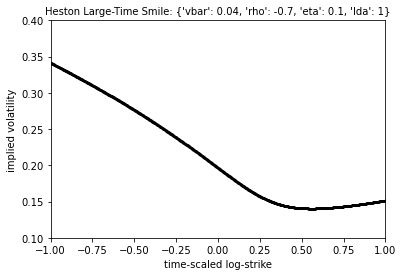

In [1]:
import numpy as np
import matplotlib.pyplot as plt

params = {'vbar': 0.04, 'rho': -0.7, 'eta': 0.1, 'lda': 1}
vbar = params['vbar']
rho = params['rho']
eta = params['eta']
lda = params['lda']

x = np.arange(-2,2,0.002)

xi = eta**2/(lda*vbar)
a = rho*eta/lda
m = -rho*eta/xi

A = eta*np.sqrt(1-rho**2)
B = rho*eta*(lda-rho*eta/2)
C = np.sqrt(eta**2/4+(lda-rho*eta/2)**2)
D = np.sqrt((1/A)**2+(C/B)**2)
K = np.sqrt(1+(a*A**2/(4*B))/(1-a/2))

v0 = -lda/xi*(1-a/2)-B/A**2*(x-m)-B*D/xi*np.sqrt(1+(xi/A)**2*(x-m)**2)
v1 = -lda/xi*(1-a/2)*K-B/A**2*K*(x-m)-B*D/xi/K*np.sqrt(1+(xi/A)**2*(x-m)**2)
v = 4*(v0-v1)
sig = np.sqrt(v)

plt.scatter(x,sig,c='black',s=2)
plt.xlabel('time-scaled log-strike')
plt.ylabel('implied volatility')
plt.title(f'Heston Large-Time Smile: {params}',fontsize=10)
plt.xlim([-1,1])
plt.ylim([0.1,0.4])
plt.show()

# Large-Time VG Smile

# Large-Time BG Smile

# Large-Time CGMY Smile

# Comments on Saddle-Point Trick

Our starting point is Lewis equation expanded around saddle-point $\tilde{u}$ with integral approximated as a Gaussian in large time -- for a full discussion, see section [Saddle-Point Equation](#Saddle-Point-Equation).

I thought about the analog formula for small time, but no -- this approach relies on large time and in small time non-linear terms come in, so we can no longer make Gaussian approx.

We reach following smile equation for implied variance, assuming characteristic function in large time scales as $\phi_T(u-i/2) \sim e^{-\psi(u)T}$:

$$ \frac{v(x)}{8} + \frac{x^2}{2v(x)} \sim i\tilde{u}(x)x + \psi(\tilde{u}(x)) \equiv \omega(x) $$

We proved that $\omega(x) \geq |x/2|$, so quadratic determinant is always positive. Variance $v(x)$ always exists and is positive.

Condition $\phi_T(u-i/2) \sim e^{-\psi(u)T}$ says: in large time log-spot evolves like a Levi process (of independent and stationary increments), and large-time smile converges to a stationary state. Independence leads to scaling in $T$ in exponent; staionarity leads to time-independent factor $\psi(u)$.

Our saddle-point trick works for Levy processes (by definition), and some path-dependent processes that forget about its inital states over time e.g.\ Heston/SVJ due to mean-reversion of vol.

Smile properties depend entirely on factor $\omega(x)$. If we want a complex smile of rich curvatures (say crazy W-shape), we have to design a $\psi(u)$ complex enough, that fulfills martingale condition $\psi(-i/2) = 0$ -- is $\psi(u)$, rather than log-spot process $X_T$, the night thing to start with? By Levy-Khintchine representation it seems there exists some Levy measure integrated to match $\psi$, at least in theory, though we risk a totally incomprehensible Levy measure. Another queston is, does arbitrary $\psi(u)$ (that fulfills margingale conditon) contain arbitrage?

To make this precise, say we want a pure-jump process (ignore drift/diffusion for now) obeying some Levy measure $\mu(\xi)$ that fulfills $\psi(u)$. By Levy-Khintchine, characteristic function reads

$$ \begin{aligned}
\phi_T(u) &\equiv Ee^{iuX_T} = \exp\left( T \int (e^{iu\xi}-1) \mu(\xi) d\xi \right) \\
\phi_T\left(u-\frac{i}{2}\right) &= \exp\left( T \int \left(e^{\left(iu+\frac{1}{2}\right)\xi}-1\right) \mu(\xi) d\xi \right) \equiv e^{-\psi(u)T}
\end{aligned} $$

so

$$ \psi(u) = - \int \left(e^{\left(iu+\frac{1}{2}\right)\xi}-1\right) \mu(\xi) d\xi $$

which fulfills martingale condition

$$ \psi(-i/2) = 0 $$

Levy measure $\mu$ can be obtained via inverse-Fourier:

$$ \begin{aligned}
\psi\left(u+\frac{i}{2}\right) &= - \int e^{iu\xi} \mu(\xi) d\xi + \int \mu(\xi) d\xi \\
\mu(\xi) &= - \mathcal{F}^{-1} \psi\left(u+\frac{i}{2}\right) + \left( \int \mu(\xi) d\xi \right) \delta(\xi)
\end{aligned} $$

Let's ignore the delta function explosion because Levy measure cannot count zero jump anyway -- they are indistinguishable from diffusion! Either it is part of $\mu$ or will cancel with some infinity in inverse-Fourier term.

It seems from $\psi$ we can back out its underlying Levy measure $\mu$, which corresponds to a Levy process. What extra conditions do we need on $\psi$ s.t. the Levy process is well-defined?

## Some Opinions

I think Merton-jump model with following extensions can potentially fit a smile of rich curvatures. In Merton we assume Gaussian log-jumps obeying Poisson arrival -- this has a (finite-activity) Gaussian Levy measure. With sufficiently many Gaussians (with different arrival rates $\lambda$ and spreads $\sigma^2$) this seems to match arbitrary Levy measure. More precisely, any Levy measure may be represented in superposition of compound Poisson processes

$$ \mu(\xi) = \int d\alpha \lambda(\alpha) \frac{e^{-(\xi-\alpha)^2/2\sigma^2(\alpha)}}{\sqrt{2\pi}} $$

Activity is controlled by $\lambda$ -- say for infinite activity, $\lambda$ integrates to infinity. This probably has too many degrees of freedom $\{\lambda(\alpha), \sigma^2(\alpha)\}$ -- extra constraints are needed. This
essentially says, any function may be expanded in Gaussian basis -- I think this is very plausible. Now that we have a Levy measure flexible enough, this fits complex smile.

The first thing to do is, work out large-time Merton smile and study its curvature, then progressively add Poisson jumps and observe how this changes curvature.

# References

* Gatheral, The Volatility Surface: A Practitioner's Guide
* Gatheral/Jacquier, Convergence of Heston to SVI
* Madan/Wang, Additive Processes with Bilateral Gamma Marginals